In [165]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

page = requests.get("https://www.imdb.com/search/title/?genres=mystery&explore=title_type,genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=f1cf7b98-03fb-4a83-95f3-d833fdba0471&pf_rd_r=8DNGVGGZP5JGM78YE456&pf_rd_s=center-3&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_pr3_i_2")
soup = BeautifulSoup(page.text) 
    
names=[]
years=[]
certificates=[]
runtime=[]
genres=[]
ratings=[]
votee=[]
starcast=[]




########### NAME ######################################################################################################

p = soup.find_all("h3",class_="lister-item-header")
#names=[]
for i in range(0,50):
    name=p[i].text.split("\n")[2]
    names.append(name)

    
############ YEAR ############################################################################################################


y=soup.find_all("span",class_="lister-item-year text-muted unbold")
#years=[]
for i in range(0,50):
    year=y[i].text.replace('(', '').replace(')', '')
    years.append(year)
    
########## CERTIFICATE ##################################################################################################

#certificates=[]
zzz=soup.find_all("div",class_="lister-item-content")
main=[]
for i in range(0,50):
    abc=zzz[i].text.split("\n")[7:10]
    main.append(abc)

for k in range(0,50):
    try:
        if (main[k][0]=='') or (main[k][0].split("mi")[1])=="n":
            certificates.append(np.nan)
    except IndexError:
            certificates.append(main[k][0])
    
############ RUNTIME   #####################################################################################################



# r=soup.find_all("span",class_="runtime") 

# runtimes=[]
# for i in range(0,50):
#     try:
#         runtime=r[i].text.split(" ")[0]
#         runtimes.append(runtime)



#     except IndexError:   
#         runtimes.append(np.nan)
#runtime=[]
for i in range(0,50):
    if "min" in main[i][2]:
        runtime.append(main[i][2])
    elif "min" in main[i][1]:
        runtime.append(main[i][1])
    elif "min" in main[i][0]:
        runtime.append(main[i][0])
    else:
        runtime.append(np.nan)
   


 #################### GENRE ###################################################################################################



j=soup.find_all("span",class_="genre")    
#genres=[]
for i in range(0,50):
    try:
        genre1=j[i].text.split("\n")[1].strip()
        genres.append(genre1)
        
    except IndexError:
        genres.append(np.nan)

########## RATINGS ##########################################################################################################
rate=soup.find_all("div",class_="lister-item mode-advanced") 
null=[]
for i in range(0,50):
    ss=(re.findall("\s\s\d.\d",rate[i].text))
    null.append(ss)
#ratings=[]
for i in range(0,50):
    try:
        char=null[i][0].split("\n")[2]
        ratings.append(char)
    except IndexError:
        ratings.append(np.nan)



 ############### VOTES #####################################################################################################
li=soup.find_all("div",class_="lister-item mode-advanced") 
vs=[]
for i in range(0,50):
        plm=(re.findall("\s\d+,\d+\s|\s\d+,\d+,\d+\s",li[i].text))
        vs.append(plm)
#votee=[]
for i in range(0,50):
    try:
        var=vs[i][0].split("\n")[1]
        votee.append(var)
    except IndexError:
        votee.append(np.nan)        
############# STAR ###########################################################################################################  


zzz=soup.find_all("p",class_="")   

base=[]
#starcast=[]
for i in range(0,50):
    for j in range(1,3):
        aft1=zzz[i].text.split("Stars:")[1].split("\n")[j].replace(",","").strip()
        base.append(aft1)
    sss=list(base)
    starcast.append(sss)
    base.clear()


In [166]:
df123= pd.DataFrame({
    "Movie":names,
    "Year":years,
    "Certificate":certificates,
    "Runtime":runtime,
    "Genre":genres,
    "Rating":ratings,
    "Vote":votee,
    "Stars":starcast
})

In [167]:
df123

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122 min,"Drama, Mystery, Thriller",3.6,NaN,"[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356 min,"Drama, Horror, Mystery",5.9,"8,587","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45 min,"Drama, Fantasy, Horror",7.8,"113,227","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130 min,"Horror, Mystery, Sci-Fi",7.0,"117,702","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51 min,"Drama, Fantasy, Horror",8.7,"1,147,427","[Millie Bobby Brown, Finn Wolfhard]"
5,Where the Crawdads Sing,2022,UA,125 min,"Drama, Mystery, Thriller",7.1,"30,059","[Daisy Edgar-Jones, Taylor John Smith]"
6,The Patient,2022,A,NaN,"Drama, Mystery, Thriller",7.4,"2,529","[Steve Carell, Domhnall Gleeson]"
7,Only Murders in the Building,2021–,UA 16+,30 min,"Comedy, Crime, Drama",8.1,"94,197","[Steve Martin, Martin Short]"
8,Echoes,2022,A,326 min,"Drama, Mystery, Thriller",5.9,"9,035","[Michelle Monaghan, Matt Bomer]"
9,Blonde,2022,A,166 min,"Biography, Drama, Mystery",6.4,NaN,"[Ana de Armas, Lucy DeVito]"


# Data Collection

In [151]:
url ="https://www.imdb.com/search/title/?genres=mystery&start="+str(i)+"&explore=title_type,genres&ref_=adv_nxt"

# Movie = []
# Year = []
# Certificate = []
# Runtime =[]
# Genre =[]
# Rating = []
# Vote=[]
# Stars =[]
names=[]
years=[]
certificates=[]
runtime=[]
genres=[]
ratings=[]
votee=[]
starcast=[]


for i in range(51,800,50):
    urls = "https://www.imdb.com/search/title/?genres=mystery&start="+str(i)+"&explore=title_type,genres&ref_=adv_nxt"
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)
    
    ########### NAME ######################################################################################################

    p = soup.find_all("h3",class_="lister-item-header")
    #names=[]
    for i in range(0,50):
        name=p[i].text.split("\n")[2]
        names.append(name)


    ############ YEAR ############################################################################################################


    y=soup.find_all("span",class_="lister-item-year text-muted unbold")
    #years=[]
    for i in range(0,50):
        year=y[i].text.replace('(', '').replace(')', '')
        years.append(year)

    ########## CERTIFICATE ##################################################################################################

    #certificates=[]
    zzz=soup.find_all("div",class_="lister-item-content")
    main=[]
    for i in range(0,50):
        abc=zzz[i].text.split("\n")[7:10]
        main.append(abc)

    for k in range(0,50):
        try:
            if (main[k][0]=='') or (main[k][0].split("mi")[1])=="n":
                certificates.append(np.nan)
        except IndexError:
                certificates.append(main[k][0])

    ############ RUNTIME   #####################################################################################################



    # r=soup.find_all("span",class_="runtime") 

    # runtimes=[]
    # for i in range(0,50):
    #     try:
    #         runtime=r[i].text.split(" ")[0]
    #         runtimes.append(runtime)



    #     except IndexError:   
    #         runtimes.append(np.nan)
    #runtime=[]
    for i in range(0,50):
        if "min" in main[i][2]:
            runtime.append(main[i][2])
        elif "min" in main[i][1]:
            runtime.append(main[i][1])
        elif "min" in main[i][0]:
            runtime.append(main[i][0])
        else:
            runtime.append(np.nan)



     #################### GENRE ###################################################################################################



    j=soup.find_all("span",class_="genre")    
    #genres=[]
    for i in range(0,50):
        try:
            genre1=j[i].text.split("\n")[1].strip()
            genres.append(genre1)

        except IndexError:
            genres.append(np.nan)

    ########## RATINGS ##########################################################################################################
    rate=soup.find_all("div",class_="lister-item mode-advanced") 
    null=[]
    for i in range(0,50):
        ss=(re.findall("\s\s\d.\d",rate[i].text))
        null.append(ss)
    #ratings=[]
    for i in range(0,50):
        try:
            char=null[i][1].split("\n")[2]
            ratings.append(char)
        except IndexError:
            ratings.append(np.nan)





     ############### VOTES #####################################################################################################
    li=soup.find_all("div",class_="lister-item mode-advanced") 
    vs=[]
    for i in range(0,50):
            plm=(re.findall("\s\d+,\d+\s|\s\d+,\d+,\d+\s",li[i].text))
            vs.append(plm)
    #votee=[]
    for i in range(0,50):
        try:
            var=vs[i][0].split("\n")[1]
            votee.append(var)
        except IndexError:
            votee.append(np.nan)
           
    ############# STAR ###########################################################################################################  


    zzz=soup.find_all("p",class_="")   

    base=[]
    #starcast=[]
    try:
        for k in range(0,50):
            for l in range(1,3):
                aft1=zzz[k].text.split("Stars:")[1].split("\n")[l].replace(",","").strip()
                base.append(aft1)
            sss=list(base)
            starcast.append(sss)
            base.clear()
    except IndexError:
        starcast.append(np.nan)
        
    print(len(names))

    print(len(starcast))


https://www.imdb.com/search/title/?genres=mystery&start=51&explore=title_type,genres&ref_=adv_nxt
50
50
https://www.imdb.com/search/title/?genres=mystery&start=101&explore=title_type,genres&ref_=adv_nxt
100
100
https://www.imdb.com/search/title/?genres=mystery&start=151&explore=title_type,genres&ref_=adv_nxt
150
150
https://www.imdb.com/search/title/?genres=mystery&start=201&explore=title_type,genres&ref_=adv_nxt
200
200
https://www.imdb.com/search/title/?genres=mystery&start=251&explore=title_type,genres&ref_=adv_nxt
250
250
https://www.imdb.com/search/title/?genres=mystery&start=301&explore=title_type,genres&ref_=adv_nxt
300
300
https://www.imdb.com/search/title/?genres=mystery&start=351&explore=title_type,genres&ref_=adv_nxt
350
350
https://www.imdb.com/search/title/?genres=mystery&start=401&explore=title_type,genres&ref_=adv_nxt
400
400
https://www.imdb.com/search/title/?genres=mystery&start=451&explore=title_type,genres&ref_=adv_nxt
450
450
https://www.imdb.com/search/title/?genre

In [152]:
len(names)

len(certificates)

len(years)

len(ratings)

len(votee)

len(starcast)

len(genres)





750

In [153]:
len(starcast)

750

In [154]:
df2 = pd.DataFrame({
    "Movie":names,
    "Year":years,
    "Certificate":certificates,
    "Runtime":runtime,
    "Genre":genres,
    "Rating":ratings,
    "Vote":votee,
    "Stars":starcast
})

In [146]:
df2

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Death on the Nile,2022,UA,127 min,"Crime, Drama, Mystery",6.3,"138,609","[Tom Bateman, Annette Bening]"
1,The X Files,1993–2018,UA,45 min,"Crime, Drama, Mystery",8.6,"223,283","[David Duchovny, Gillian Anderson]"
2,Get Out,I 2017,15+,104 min,"Horror, Mystery, Thriller",7.7,"593,048","[Daniel Kaluuya, Allison Williams]"
3,Blue Bloods,2010–,UA 16+,43 min,"Crime, Drama, Mystery",7.7,"39,980","[Donnie Wahlberg, Bridget Moynahan]"
4,Yellowjackets,2021–,UA 16+,60 min,"Drama, Horror, Mystery",7.9,"44,246","[Melanie Lynskey, Tawny Cypress]"
...,...,...,...,...,...,...,...,...
745,A Soldier's Story,1984,NaN,101 min,"Crime, Drama, Mystery",101,"10,284","[Howard E. Rollins Jr., Adolph Caesar]"
746,La migliore offerta,2013,R,131 min,"Crime, Drama, Mystery",7.8,"119,070","[Geoffrey Rush, Jim Sturgess]"
747,Martha Marcy May Marlene,2011,R,102 min,"Drama, Mystery, Thriller",6.8,"53,361","[Elizabeth Olsen, Sarah Paulson]"
748,Dark Places,2015,R,113 min,"Crime, Drama, Mystery",6.2,"45,436","[Charlize Theron, Nicholas Hoult]"


In [9]:
final=df123.append(df2)

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\2581527585.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=df123.append(df2)


In [10]:
final

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122 min,"Drama, Mystery, Thriller",3.6,NaN,"[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356 min,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45 min,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130 min,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51 min,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
...,...,...,...,...,...,...,...,...
745,A Soldier's Story,1984,NaN,101 min,"Crime, Drama, Mystery",101,"10,283","[Howard E. Rollins Jr., Adolph Caesar]"
746,La migliore offerta,2013,R,131 min,"Crime, Drama, Mystery",7.8,"119,070","[Geoffrey Rush, Jim Sturgess]"
747,Martha Marcy May Marlene,2011,R,102 min,"Drama, Mystery, Thriller",6.8,"53,361","[Elizabeth Olsen, Sarah Paulson]"
748,Dark Places,2015,R,113 min,"Crime, Drama, Mystery",6.2,"45,436","[Charlize Theron, Nicholas Hoult]"


# DATA CLEANING

In [31]:
final.fillna(final['Certificate'].mode(), inplace = True)

In [32]:
final.head(50)

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122 min,"Drama, Mystery, Thriller",3.6,NaN,"[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356 min,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45 min,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130 min,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51 min,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
5,Where the Crawdads Sing,2022,UA,125 min,"Drama, Mystery, Thriller",7.1,"30,011","[Daisy Edgar-Jones, Taylor John Smith]"
6,The Patient,2022,A,NaN,"Drama, Mystery, Thriller",7.4,"2,522","[Steve Carell, Domhnall Gleeson]"
7,Only Murders in the Building,2021–,UA 16+,30 min,"Comedy, Crime, Drama",8.1,"94,187","[Steve Martin, Martin Short]"
8,Echoes,2022,A,326 min,"Drama, Mystery, Thriller",5.9,"9,028","[Michelle Monaghan, Matt Bomer]"
9,Blonde,2022,A,166 min,"Biography, Drama, Mystery",6.4,NaN,"[Ana de Armas, Lucy DeVito]"


In [33]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 749
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        800 non-null    object
 1   Year         800 non-null    object
 2   Certificate  594 non-null    object
 3   Runtime      763 non-null    object
 4   Genre        800 non-null    object
 5   Rating       775 non-null    object
 6   Vote         750 non-null    object
 7   Stars        800 non-null    object
dtypes: object(8)
memory usage: 56.2+ KB


In [34]:
final1=final.dropna(subset = ["Certificate"])

In [35]:
final1

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122 min,"Drama, Mystery, Thriller",3.6,NaN,"[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356 min,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45 min,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130 min,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51 min,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
...,...,...,...,...,...,...,...,...
744,I See You,II 2019,R,98 min,"Crime, Drama, Horror",6.8,"49,229","[Helen Hunt, Jon Tenney]"
746,La migliore offerta,2013,R,131 min,"Crime, Drama, Mystery",7.8,"119,070","[Geoffrey Rush, Jim Sturgess]"
747,Martha Marcy May Marlene,2011,R,102 min,"Drama, Mystery, Thriller",6.8,"53,361","[Elizabeth Olsen, Sarah Paulson]"
748,Dark Places,2015,R,113 min,"Crime, Drama, Mystery",6.2,"45,436","[Charlize Theron, Nicholas Hoult]"


In [36]:
final1.reset_index(drop = True, inplace = True)

In [37]:
final1

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122 min,"Drama, Mystery, Thriller",3.6,NaN,"[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356 min,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45 min,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130 min,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51 min,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
...,...,...,...,...,...,...,...,...
589,I See You,II 2019,R,98 min,"Crime, Drama, Horror",6.8,"49,229","[Helen Hunt, Jon Tenney]"
590,La migliore offerta,2013,R,131 min,"Crime, Drama, Mystery",7.8,"119,070","[Geoffrey Rush, Jim Sturgess]"
591,Martha Marcy May Marlene,2011,R,102 min,"Drama, Mystery, Thriller",6.8,"53,361","[Elizabeth Olsen, Sarah Paulson]"
592,Dark Places,2015,R,113 min,"Crime, Drama, Mystery",6.2,"45,436","[Charlize Theron, Nicholas Hoult]"


In [38]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        594 non-null    object
 1   Year         594 non-null    object
 2   Certificate  594 non-null    object
 3   Runtime      581 non-null    object
 4   Genre        594 non-null    object
 5   Rating       587 non-null    object
 6   Vote         575 non-null    object
 7   Stars        594 non-null    object
dtypes: object(8)
memory usage: 37.2+ KB


In [39]:
final1['Runtime'] = final1['Runtime'].str.replace ('min','') 

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\1230450821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Runtime'] = final1['Runtime'].str.replace ('min','')


In [40]:
final1.head(100)

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122,"Drama, Mystery, Thriller",3.6,NaN,"[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
...,...,...,...,...,...,...,...,...
95,Candy,2022,A,257,"Biography, Crime, Drama",7.2,"12,036","[Jessica Biel, Melanie Lynskey]"
96,Eyes Wide Shut,1999,18,159,"Drama, Mystery, Thriller",7.5,"338,328","[Tom Cruise, Nicole Kidman]"
97,The Good Wife,2009–2016,16,43,"Crime, Drama, Mystery",8.4,"75,482","[Julianna Margulies, Chris Noth]"
98,Arrow,2012–2020,A,42,"Action, Adventure, Crime",7.5,"429,821","[Stephen Amell, Katie Cassidy]"


In [41]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        594 non-null    object
 1   Year         594 non-null    object
 2   Certificate  594 non-null    object
 3   Runtime      581 non-null    object
 4   Genre        594 non-null    object
 5   Rating       587 non-null    object
 6   Vote         575 non-null    object
 7   Stars        594 non-null    object
dtypes: object(8)
memory usage: 37.2+ KB


In [42]:
final1['Runtime'] = final1['Runtime'].replace(np.nan,'Empty') 

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\1847925427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Runtime'] = final1['Runtime'].replace(np.nan,'Empty')


In [43]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie        594 non-null    object
 1   Year         594 non-null    object
 2   Certificate  594 non-null    object
 3   Runtime      594 non-null    object
 4   Genre        594 non-null    object
 5   Rating       587 non-null    object
 6   Vote         575 non-null    object
 7   Stars        594 non-null    object
dtypes: object(8)
memory usage: 37.2+ KB


In [44]:
final1.Runtime.isnull().sum()

0

In [45]:
final1['Rating'] = final1['Rating'].replace('/','.') 

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\1964277076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Rating'] = final1['Rating'].replace('/','.')


In [46]:
final1[final1['Rating']=='8/1']

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
64,Ojing-eo geim,2021–,18,55,"Action, Drama, Mystery",8/1,"434,406","[Lee Jung-jae, Park Hae-soo]"
68,Ófærð,2015–,18,60,"Crime, Drama, Mystery",8/1,"21,518","[Ólafur Darri Ólafsson, Ilmur Kristjánsdóttir]"
80,Blade Runner 2049,2017,UA,164,"Action, Drama, Mystery",8/1,"559,452","[Harrison Ford, Ryan Gosling]"


In [58]:
final1.Rating.iloc[64]=8.1

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\2472939434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1.Rating.iloc[64]=8.1


In [59]:
final1.Rating.iloc[68]=8.1

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\3410253775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1.Rating.iloc[68]=8.1


In [60]:
final1.Rating.iloc[80]=8.1

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\2736462471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1.Rating.iloc[80]=8.1


In [61]:
final1[final1['Rating']=='7/1']

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars


In [55]:
final1.Rating.iloc[50]=7.1

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\2089479845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1.Rating.iloc[50]=7.1


In [56]:
final1.Rating.iloc[73]=7.1

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\4235305170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1.Rating.iloc[73]=7.1


In [62]:
final1['Rating'] = final1['Rating'].astype('float')

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\1750789202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Rating'] = final1['Rating'].astype('float')


In [63]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        594 non-null    object 
 1   Year         594 non-null    object 
 2   Certificate  594 non-null    object 
 3   Runtime      594 non-null    object 
 4   Genre        594 non-null    object 
 5   Rating       587 non-null    float64
 6   Vote         575 non-null    object 
 7   Stars        594 non-null    object 
dtypes: float64(1), object(7)
memory usage: 37.2+ KB


In [64]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        594 non-null    object 
 1   Year         594 non-null    object 
 2   Certificate  594 non-null    object 
 3   Runtime      594 non-null    object 
 4   Genre        594 non-null    object 
 5   Rating       587 non-null    float64
 6   Vote         575 non-null    object 
 7   Stars        594 non-null    object 
dtypes: float64(1), object(7)
memory usage: 37.2+ KB


In [65]:
final1['Rating'] = final1['Rating'].fillna(final1 ['Rating'].median())

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\3917774974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Rating'] = final1['Rating'].fillna(final1 ['Rating'].median())


In [66]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        594 non-null    object 
 1   Year         594 non-null    object 
 2   Certificate  594 non-null    object 
 3   Runtime      594 non-null    object 
 4   Genre        594 non-null    object 
 5   Rating       594 non-null    float64
 6   Vote         575 non-null    object 
 7   Stars        594 non-null    object 
dtypes: float64(1), object(7)
memory usage: 37.2+ KB


In [67]:
final1['Vote']

0            NaN
1          8,568
2        113,185
3        117,627
4      1,147,405
         ...    
589       49,229
590      119,070
591       53,361
592       45,436
593       35,989
Name: Vote, Length: 594, dtype: object

In [68]:
final1.isnull().sum()

Movie           0
Year            0
Certificate     0
Runtime         0
Genre           0
Rating          0
Vote           19
Stars           0
dtype: int64

In [69]:
final1.head(30)

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122,"Drama, Mystery, Thriller",3.6,NaN,"[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
5,Where the Crawdads Sing,2022,UA,125,"Drama, Mystery, Thriller",7.1,"30,011","[Daisy Edgar-Jones, Taylor John Smith]"
6,The Patient,2022,A,Empty,"Drama, Mystery, Thriller",7.4,"2,522","[Steve Carell, Domhnall Gleeson]"
7,Only Murders in the Building,2021–,UA 16+,30,"Comedy, Crime, Drama",8.1,"94,187","[Steve Martin, Martin Short]"
8,Echoes,2022,A,326,"Drama, Mystery, Thriller",5.9,"9,028","[Michelle Monaghan, Matt Bomer]"
9,Blonde,2022,A,166,"Biography, Drama, Mystery",6.4,NaN,"[Ana de Armas, Lucy DeVito]"


In [70]:
final1["Vote"].fillna( method ='bfill', inplace = True)

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\2275537484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1["Vote"].fillna( method ='bfill', inplace = True)


In [71]:
final1.isnull().sum()

Movie          0
Year           0
Certificate    0
Runtime        0
Genre          0
Rating         0
Vote           0
Stars          0
dtype: int64

In [72]:
final1.head(30)

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122,"Drama, Mystery, Thriller",3.6,"8,568","[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
5,Where the Crawdads Sing,2022,UA,125,"Drama, Mystery, Thriller",7.1,"30,011","[Daisy Edgar-Jones, Taylor John Smith]"
6,The Patient,2022,A,Empty,"Drama, Mystery, Thriller",7.4,"2,522","[Steve Carell, Domhnall Gleeson]"
7,Only Murders in the Building,2021–,UA 16+,30,"Comedy, Crime, Drama",8.1,"94,187","[Steve Martin, Martin Short]"
8,Echoes,2022,A,326,"Drama, Mystery, Thriller",5.9,"9,028","[Michelle Monaghan, Matt Bomer]"
9,Blonde,2022,A,166,"Biography, Drama, Mystery",6.4,"65,624","[Ana de Armas, Lucy DeVito]"


In [73]:
final1['Runtime'] = final1['Runtime'].replace('Empty',np.nan)

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\927827129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Runtime'] = final1['Runtime'].replace('Empty',np.nan)


In [74]:
final1.head(50)

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122,"Drama, Mystery, Thriller",3.6,"8,568","[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
5,Where the Crawdads Sing,2022,UA,125,"Drama, Mystery, Thriller",7.1,"30,011","[Daisy Edgar-Jones, Taylor John Smith]"
6,The Patient,2022,A,NaN,"Drama, Mystery, Thriller",7.4,"2,522","[Steve Carell, Domhnall Gleeson]"
7,Only Murders in the Building,2021–,UA 16+,30,"Comedy, Crime, Drama",8.1,"94,187","[Steve Martin, Martin Short]"
8,Echoes,2022,A,326,"Drama, Mystery, Thriller",5.9,"9,028","[Michelle Monaghan, Matt Bomer]"
9,Blonde,2022,A,166,"Biography, Drama, Mystery",6.4,"65,624","[Ana de Armas, Lucy DeVito]"


In [75]:
final1['Runtime'] = final1['Runtime'].astype('float')

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\2038468860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Runtime'] = final1['Runtime'].astype('float')


In [76]:
final1['Runtime'] = final1['Runtime'].fillna(final1 ['Runtime'].median())

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\3486913569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Runtime'] = final1['Runtime'].fillna(final1 ['Runtime'].median())


In [77]:
final1.head(50)

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122.0,"Drama, Mystery, Thriller",3.6,"8,568","[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356.0,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45.0,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130.0,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51.0,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
5,Where the Crawdads Sing,2022,UA,125.0,"Drama, Mystery, Thriller",7.1,"30,011","[Daisy Edgar-Jones, Taylor John Smith]"
6,The Patient,2022,A,104.0,"Drama, Mystery, Thriller",7.4,"2,522","[Steve Carell, Domhnall Gleeson]"
7,Only Murders in the Building,2021–,UA 16+,30.0,"Comedy, Crime, Drama",8.1,"94,187","[Steve Martin, Martin Short]"
8,Echoes,2022,A,326.0,"Drama, Mystery, Thriller",5.9,"9,028","[Michelle Monaghan, Matt Bomer]"
9,Blonde,2022,A,166.0,"Biography, Drama, Mystery",6.4,"65,624","[Ana de Armas, Lucy DeVito]"


In [78]:
final1['Runtime'] = final1['Runtime'].astype('int64')

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\450456470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Runtime'] = final1['Runtime'].astype('int64')


In [79]:
final1.head()

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122,"Drama, Mystery, Thriller",3.6,"8,568","[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"


In [80]:
final1['Movie'] = final1['Movie'].astype('str')

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\1193989497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Movie'] = final1['Movie'].astype('str')


In [81]:
final1['Genre'] = final1['Genre'].astype('str')

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\3454744405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1['Genre'] = final1['Genre'].astype('str')


In [82]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        594 non-null    object 
 1   Year         594 non-null    object 
 2   Certificate  594 non-null    object 
 3   Runtime      594 non-null    int64  
 4   Genre        594 non-null    object 
 5   Rating       594 non-null    float64
 6   Vote         594 non-null    object 
 7   Stars        594 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.2+ KB


In [83]:
final1.isnull().sum()

Movie          0
Year           0
Certificate    0
Runtime        0
Genre          0
Rating         0
Vote           0
Stars          0
dtype: int64

In [84]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        594 non-null    object 
 1   Year         594 non-null    object 
 2   Certificate  594 non-null    object 
 3   Runtime      594 non-null    int64  
 4   Genre        594 non-null    object 
 5   Rating       594 non-null    float64
 6   Vote         594 non-null    object 
 7   Stars        594 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.2+ KB


In [85]:
final1[final1['Rating']==100]

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars


In [86]:
final1.Rating.iloc[40]

6.3

In [87]:
final1

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122,"Drama, Mystery, Thriller",3.6,"8,568","[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356,"Drama, Horror, Mystery",5.9,"8,568","[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45,"Drama, Fantasy, Horror",7.8,"113,185","[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130,"Horror, Mystery, Sci-Fi",7.0,"117,627","[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51,"Drama, Fantasy, Horror",8.7,"1,147,405","[Millie Bobby Brown, Finn Wolfhard]"
...,...,...,...,...,...,...,...,...
589,I See You,II 2019,R,98,"Crime, Drama, Horror",6.8,"49,229","[Helen Hunt, Jon Tenney]"
590,La migliore offerta,2013,R,131,"Crime, Drama, Mystery",7.8,"119,070","[Geoffrey Rush, Jim Sturgess]"
591,Martha Marcy May Marlene,2011,R,102,"Drama, Mystery, Thriller",6.8,"53,361","[Elizabeth Olsen, Sarah Paulson]"
592,Dark Places,2015,R,113,"Crime, Drama, Mystery",6.2,"45,436","[Charlize Theron, Nicholas Hoult]"


In [88]:
final1.Vote=final1.Vote.str.replace(",","").astype('float')

C:\Users\Neil\AppData\Local\Temp\ipykernel_7276\518704653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1.Vote=final1.Vote.str.replace(",","").astype('float')


In [89]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        594 non-null    object 
 1   Year         594 non-null    object 
 2   Certificate  594 non-null    object 
 3   Runtime      594 non-null    int64  
 4   Genre        594 non-null    object 
 5   Rating       594 non-null    float64
 6   Vote         594 non-null    float64
 7   Stars        594 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ KB


In [90]:
final1.head(50)

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122,"Drama, Mystery, Thriller",3.6,8568.0,"[Florence Pugh, Olivia Wilde]"
1,Devil in Ohio,2022,UA 16+,356,"Drama, Horror, Mystery",5.9,8568.0,"[Emily Deschanel, Sam Jaeger]"
2,The Sandman,2022–,A,45,"Drama, Fantasy, Horror",7.8,113185.0,"[Tom Sturridge, Boyd Holbrook]"
3,Nope,2022,A,130,"Horror, Mystery, Sci-Fi",7.0,117627.0,"[Daniel Kaluuya, Keke Palmer]"
4,Stranger Things,2016–,15,51,"Drama, Fantasy, Horror",8.7,1147405.0,"[Millie Bobby Brown, Finn Wolfhard]"
5,Where the Crawdads Sing,2022,UA,125,"Drama, Mystery, Thriller",7.1,30011.0,"[Daisy Edgar-Jones, Taylor John Smith]"
6,The Patient,2022,A,104,"Drama, Mystery, Thriller",7.4,2522.0,"[Steve Carell, Domhnall Gleeson]"
7,Only Murders in the Building,2021–,UA 16+,30,"Comedy, Crime, Drama",8.1,94187.0,"[Steve Martin, Martin Short]"
8,Echoes,2022,A,326,"Drama, Mystery, Thriller",5.9,9028.0,"[Michelle Monaghan, Matt Bomer]"
9,Blonde,2022,A,166,"Biography, Drama, Mystery",6.4,65624.0,"[Ana de Armas, Lucy DeVito]"


In [91]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        594 non-null    object 
 1   Year         594 non-null    object 
 2   Certificate  594 non-null    object 
 3   Runtime      594 non-null    int64  
 4   Genre        594 non-null    object 
 5   Rating       594 non-null    float64
 6   Vote         594 non-null    float64
 7   Stars        594 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ KB


In [92]:
final1.to_csv(r'C:\Users\Neil\Desktop\IMDBmain.csv', index = False)

In [93]:
final1.to_csv(r'C:\Users\Neil\Desktop\IMDBm1.csv', index = True)

# Data Analysis

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [95]:
final1.describe()

,Runtime,Rating,Vote
count,594.000000,594.000000,5.940000e+02
mean,110.193603,7.083165,1.707260e+05
std,76.606997,0.980546,2.124475e+05
min,15.000000,2.800000,1.422000e+03
25%,60.000000,6.425000,3.657000e+04
50%,104.000000,7.200000,9.843450e+04
75%,121.000000,7.800000,2.239425e+05
max,572.000000,9.300000,1.624711e+06


In [96]:
imdb =  pd.read_csv("C:/Users/Neil/Desktop/IMDBm1.csv")

In [97]:
imdb.head(10)

,Unnamed: 0,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,0,Don't Worry Darling,I 2022,R,122,"Drama, Mystery, Thriller",3.6,8568.0,"['Florence Pugh', 'Olivia Wilde']"
1,1,Devil in Ohio,2022,UA 16+,356,"Drama, Horror, Mystery",5.9,8568.0,"['Emily Deschanel', 'Sam Jaeger']"
2,2,The Sandman,2022–,A,45,"Drama, Fantasy, Horror",7.8,113185.0,"['Tom Sturridge', 'Boyd Holbrook']"
3,3,Nope,2022,A,130,"Horror, Mystery, Sci-Fi",7.0,117627.0,"['Daniel Kaluuya', 'Keke Palmer']"
4,4,Stranger Things,2016–,15,51,"Drama, Fantasy, Horror",8.7,1147405.0,"['Millie Bobby Brown', 'Finn Wolfhard']"
5,5,Where the Crawdads Sing,2022,UA,125,"Drama, Mystery, Thriller",7.1,30011.0,"['Daisy Edgar-Jones', 'Taylor John Smith']"
6,6,The Patient,2022,A,104,"Drama, Mystery, Thriller",7.4,2522.0,"['Steve Carell', 'Domhnall Gleeson']"
7,7,Only Murders in the Building,2021–,UA 16+,30,"Comedy, Crime, Drama",8.1,94187.0,"['Steve Martin', 'Martin Short']"
8,8,Echoes,2022,A,326,"Drama, Mystery, Thriller",5.9,9028.0,"['Michelle Monaghan', 'Matt Bomer']"
9,9,Blonde,2022,A,166,"Biography, Drama, Mystery",6.4,65624.0,"['Ana de Armas', 'Lucy DeVito']"


In [98]:
imdb.tail()

,Unnamed: 0,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
589,589,I See You,II 2019,R,98,"Crime, Drama, Horror",6.8,49229.0,"['Helen Hunt', 'Jon Tenney']"
590,590,La migliore offerta,2013,R,131,"Crime, Drama, Mystery",7.8,119070.0,"['Geoffrey Rush', 'Jim Sturgess']"
591,591,Martha Marcy May Marlene,2011,R,102,"Drama, Mystery, Thriller",6.8,53361.0,"['Elizabeth Olsen', 'Sarah Paulson']"
592,592,Dark Places,2015,R,113,"Crime, Drama, Mystery",6.2,45436.0,"['Charlize Theron', 'Nicholas Hoult']"
593,593,Eli,I 2019,R,98,"Drama, Horror, Mystery",5.8,35989.0,"['Charlie Shotwell', 'Kelly Reilly']"


In [99]:
imdb.shape

(594, 9)

In [100]:
imdb.describe()

,Unnamed: 0,Runtime,Rating,Vote
count,594.000000,594.000000,594.000000,5.940000e+02
mean,296.500000,110.193603,7.083165,1.707260e+05
std,171.617307,76.606997,0.980546,2.124475e+05
min,0.000000,15.000000,2.800000,1.422000e+03
25%,148.250000,60.000000,6.425000,3.657000e+04
50%,296.500000,104.000000,7.200000,9.843450e+04
75%,444.750000,121.000000,7.800000,2.239425e+05
max,593.000000,572.000000,9.300000,1.624711e+06


In [101]:
imdb.nunique()

Unnamed: 0     594
Movie          582
Year           157
Certificate     23
Runtime        143
Genre           88
Rating          52
Vote           573
Stars          579
dtype: int64

In [102]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   594 non-null    int64  
 1   Movie        594 non-null    object 
 2   Year         594 non-null    object 
 3   Certificate  594 non-null    object 
 4   Runtime      594 non-null    int64  
 5   Genre        594 non-null    object 
 6   Rating       594 non-null    float64
 7   Vote         594 non-null    float64
 8   Stars        594 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 41.9+ KB


In [103]:
imdb.isnull().sum()

Unnamed: 0     0
Movie          0
Year           0
Certificate    0
Runtime        0
Genre          0
Rating         0
Vote           0
Stars          0
dtype: int64

In [126]:
imdbcore=imdb11.corr()

In [127]:
imdbcore

,Runtime,Rating,Vote
Runtime,1.000000,-0.006296,0.028283
Rating,-0.006296,1.000000,0.375142
Vote,0.028283,0.375142,1.000000


In [106]:
imdb11 = imdb.loc[:, ~imdb.columns.str.contains('^Unnamed')]

In [107]:
imdb11

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
0,Don't Worry Darling,I 2022,R,122,"Drama, Mystery, Thriller",3.6,8568.0,"['Florence Pugh', 'Olivia Wilde']"
1,Devil in Ohio,2022,UA 16+,356,"Drama, Horror, Mystery",5.9,8568.0,"['Emily Deschanel', 'Sam Jaeger']"
2,The Sandman,2022–,A,45,"Drama, Fantasy, Horror",7.8,113185.0,"['Tom Sturridge', 'Boyd Holbrook']"
3,Nope,2022,A,130,"Horror, Mystery, Sci-Fi",7.0,117627.0,"['Daniel Kaluuya', 'Keke Palmer']"
4,Stranger Things,2016–,15,51,"Drama, Fantasy, Horror",8.7,1147405.0,"['Millie Bobby Brown', 'Finn Wolfhard']"
...,...,...,...,...,...,...,...,...
589,I See You,II 2019,R,98,"Crime, Drama, Horror",6.8,49229.0,"['Helen Hunt', 'Jon Tenney']"
590,La migliore offerta,2013,R,131,"Crime, Drama, Mystery",7.8,119070.0,"['Geoffrey Rush', 'Jim Sturgess']"
591,Martha Marcy May Marlene,2011,R,102,"Drama, Mystery, Thriller",6.8,53361.0,"['Elizabeth Olsen', 'Sarah Paulson']"
592,Dark Places,2015,R,113,"Crime, Drama, Mystery",6.2,45436.0,"['Charlize Theron', 'Nicholas Hoult']"


# DATA VISUALIZATION

## univariate Analysis

C:\Users\Neil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vote', ylabel='Density'>

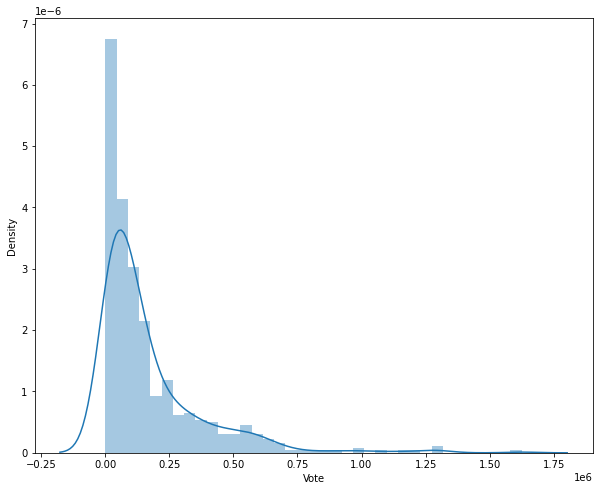

In [108]:
plt.figure(figsize=(10,8))
sns.distplot(imdb11['Vote'])

C:\Users\Neil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

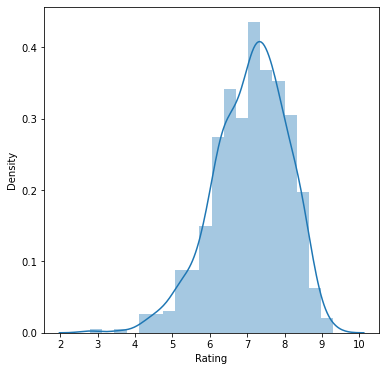

In [109]:
plt.figure(figsize=(6,6))
sns.distplot(imdb11['Rating'])

C:\Users\Neil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Runtime', ylabel='Density'>

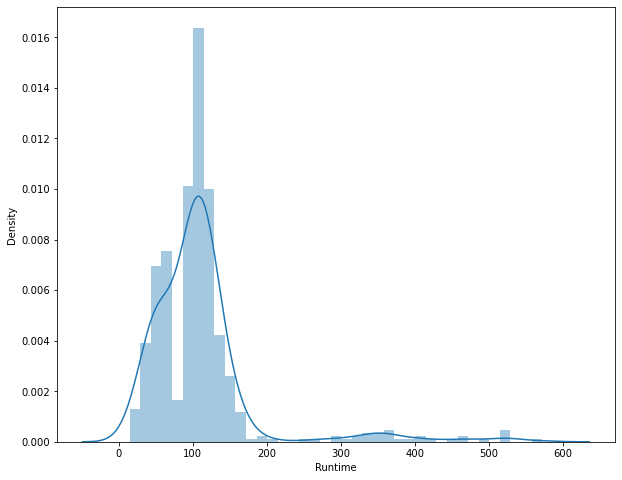

In [110]:
plt.figure(figsize=(10,8))
sns.distplot(imdb11['Runtime'])

In [111]:
final1['Certificate'].value_counts()

A            174
18            84
UA            80
R             60
16            44
U             38
UA 16+        21
16+           14
15+           13
PG-13         13
13            10
PG             8
Not Rated      8
UA 13+         6
18+            5
12+            3
7              3
15             2
13+            2
UA 7+          2
(Banned)       2
12             1
(2021)         1
Name: Certificate, dtype: int64

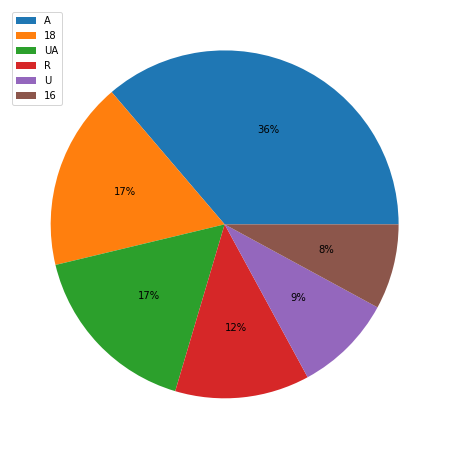

In [113]:
plt.figure(figsize=(8,8))
c=['A','18','UA','R','U','16','PG-13','UA 16+','16+','13','Not Rated','15+','PG','18+','7','UA 13+','UA 7+','12+','13+','(Banned)','15','NC-17','12','(2021)','U/A']
plt.pie(imdb11['Certificate'].value_counts()[:6],autopct="%.0f%%")
plt.legend(c,loc='upper left')


In [114]:
imdb11[['Runtime','Rating','Vote']].describe()

,Runtime,Rating,Vote
count,594.000000,594.000000,5.940000e+02
mean,110.193603,7.083165,1.707260e+05
std,76.606997,0.980546,2.124475e+05
min,15.000000,2.800000,1.422000e+03
25%,60.000000,6.425000,3.657000e+04
50%,104.000000,7.200000,9.843450e+04
75%,121.000000,7.800000,2.239425e+05
max,572.000000,9.300000,1.624711e+06


In [115]:
final1['Runtime'].mean()

110.1936026936027

#### Continuous Variables

<AxesSubplot:ylabel='Frequency'>

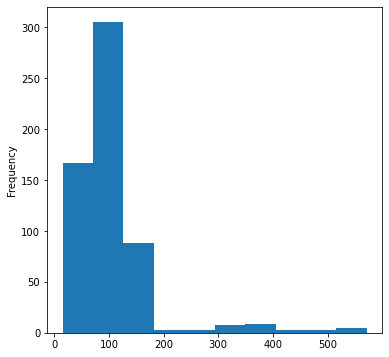

In [116]:
plt.figure(figsize=(6,6))
imdb11['Runtime'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

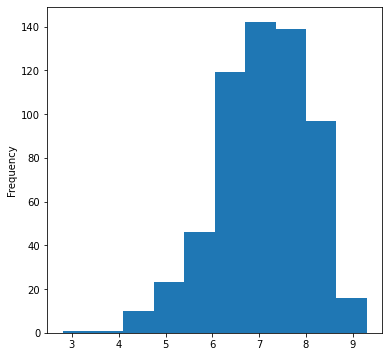

In [117]:
plt.figure(figsize=(6,6))
imdb11['Rating'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

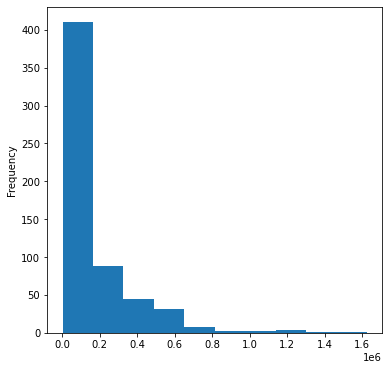

In [118]:
plt.figure(figsize=(6,6))
imdb11['Vote'].plot(kind='hist', bins=10)

<AxesSubplot:>

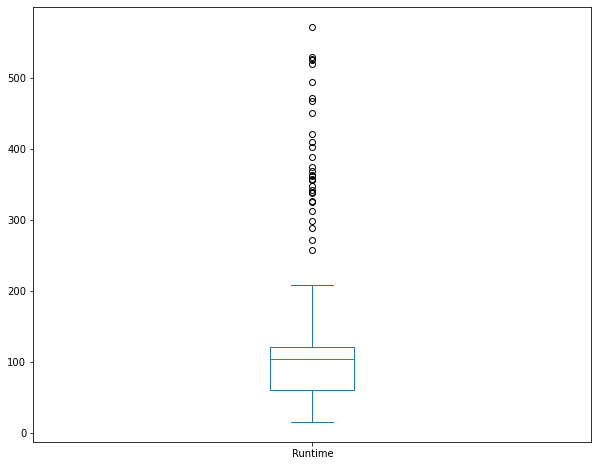

In [119]:
plt.figure(figsize=(10,8))
imdb11['Runtime'].plot(kind='box')

<AxesSubplot:>

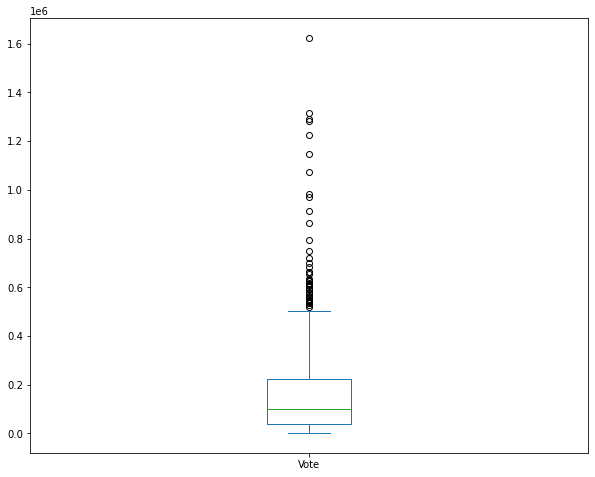

In [120]:
plt.figure(figsize=(10,8))
imdb11['Vote'].plot(kind='box')

<AxesSubplot:>

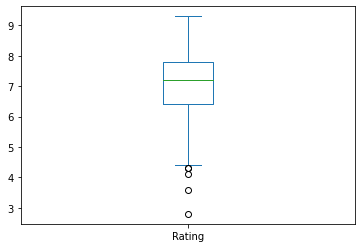

In [121]:
imdb11['Rating'].plot(kind='box')

In [122]:
imdb11[['Rating','Movie']].groupby('Rating').count()

,Movie
Rating,
2.8,1
3.6,1
4.1,1
4.3,2
4.4,2
4.6,2
4.7,3
4.8,2
4.9,2


<Figure size 288x288 with 0 Axes>

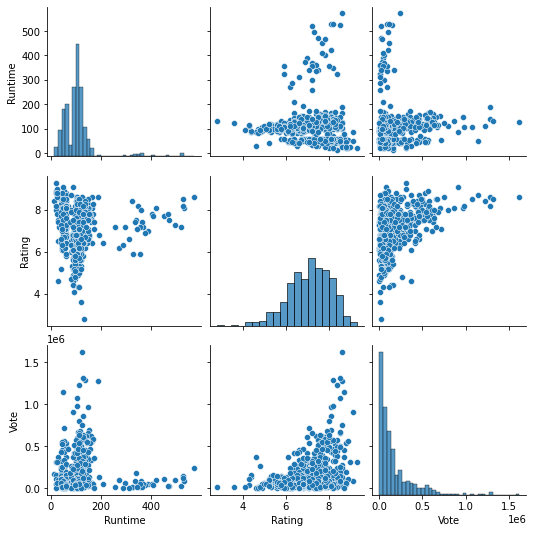

In [123]:
plt.figure(figsize=(4,4))
sns.pairplot(imdb11)

<AxesSubplot:>

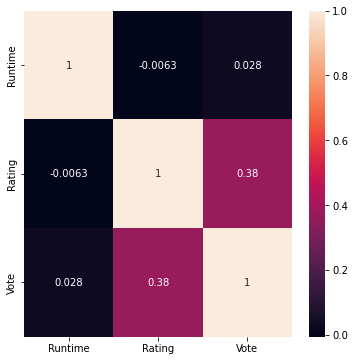

In [128]:
plt.figure(figsize=(6,6))
sns.heatmap(imdbcore,xticklabels=imdbcore.columns,yticklabels=imdbcore.columns,annot=True)

<Figure size 1080x1080 with 0 Axes>

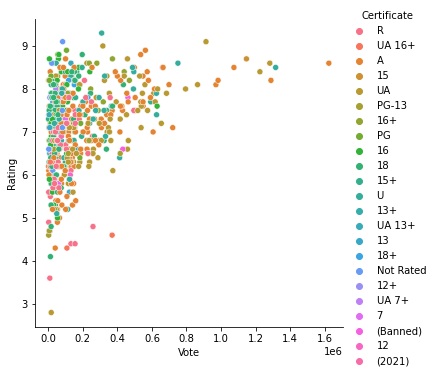

In [129]:
plt.figure(figsize=(15,15))
sns.relplot(x='Vote',y='Rating',hue='Certificate',data=imdb11)

<Figure size 1080x1080 with 0 Axes>

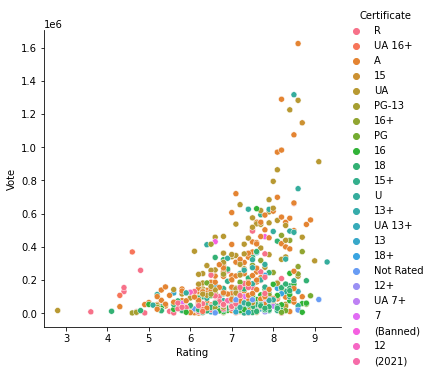

In [130]:
plt.figure(figsize=(15,15))
sns.relplot(x='Rating',y='Vote',hue='Certificate',data=imdb11)

C:\Users\Neil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vote', ylabel='Certificate'>

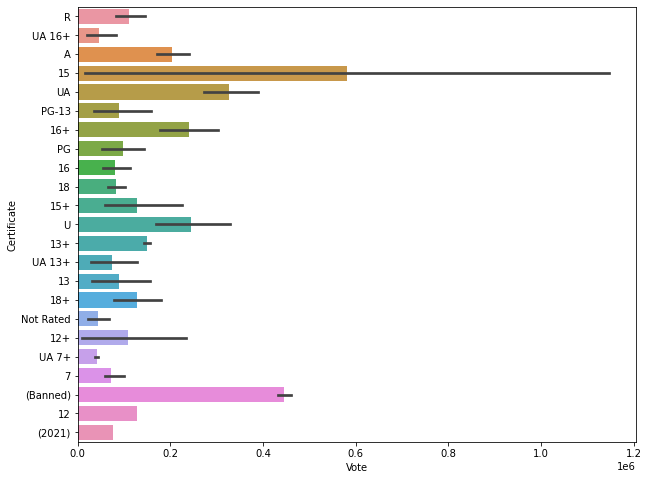

In [131]:
plt.figure(figsize=(10,8))
sns.barplot(imdb11['Vote'],imdb['Certificate'])

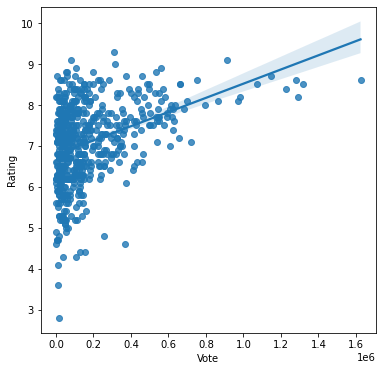

In [132]:
plt.figure(figsize=(6,6))
sns.regplot(x='Vote',y='Rating',data=imdb11)
plt.show()

In [133]:
final1[final1['Certificate']=='18+'] 

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
124,Gotham,2014–2019,18+,42,"Action, Crime, Drama",7.8,229188.0,"[Ben McKenzie, Jada Pinkett Smith]"
130,How to Get Away with Murder,2014–2020,18+,43,"Crime, Drama, Mystery",8.1,150182.0,"[Viola Davis, Billy Brown]"
141,Carnival Row,2019–,18+,56,"Crime, Drama, Fantasy",7.8,61869.0,"[Jamie Harris, Orlando Bloom]"
226,Watchmen,2019,18+,527,"Crime, Drama, Mystery",8.2,117747.0,"[Regina King, Yahya Abdul-Mateen II]"
300,Preacher,2016–2019,18+,60,"Adventure, Drama, Fantasy",7.9,74927.0,"[Dominic Cooper, Joe Gilgun]"


C:\Users\Neil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vote', ylabel='Rating'>

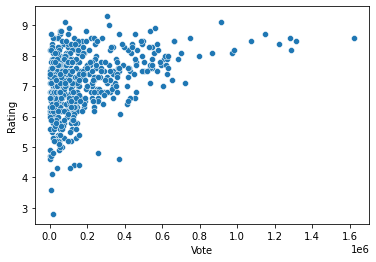

In [134]:
sns.scatterplot(imdb11.Vote,imdb11.Rating)

In [135]:
final1[final1['Certificate']=='18+'] 

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
124,Gotham,2014–2019,18+,42,"Action, Crime, Drama",7.8,229188.0,"[Ben McKenzie, Jada Pinkett Smith]"
130,How to Get Away with Murder,2014–2020,18+,43,"Crime, Drama, Mystery",8.1,150182.0,"[Viola Davis, Billy Brown]"
141,Carnival Row,2019–,18+,56,"Crime, Drama, Fantasy",7.8,61869.0,"[Jamie Harris, Orlando Bloom]"
226,Watchmen,2019,18+,527,"Crime, Drama, Mystery",8.2,117747.0,"[Regina King, Yahya Abdul-Mateen II]"
300,Preacher,2016–2019,18+,60,"Adventure, Drama, Fantasy",7.9,74927.0,"[Dominic Cooper, Joe Gilgun]"


In [136]:
final1 [ (final1 ['Certificate'] == '18+') & (final1 ['Rating'] >7.1) & (final1 ['Vote']>50000)]

,Movie,Year,Certificate,Runtime,Genre,Rating,Vote,Stars
124,Gotham,2014–2019,18+,42,"Action, Crime, Drama",7.8,229188.0,"[Ben McKenzie, Jada Pinkett Smith]"
130,How to Get Away with Murder,2014–2020,18+,43,"Crime, Drama, Mystery",8.1,150182.0,"[Viola Davis, Billy Brown]"
141,Carnival Row,2019–,18+,56,"Crime, Drama, Fantasy",7.8,61869.0,"[Jamie Harris, Orlando Bloom]"
226,Watchmen,2019,18+,527,"Crime, Drama, Mystery",8.2,117747.0,"[Regina King, Yahya Abdul-Mateen II]"
300,Preacher,2016–2019,18+,60,"Adventure, Drama, Fantasy",7.9,74927.0,"[Dominic Cooper, Joe Gilgun]"


<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

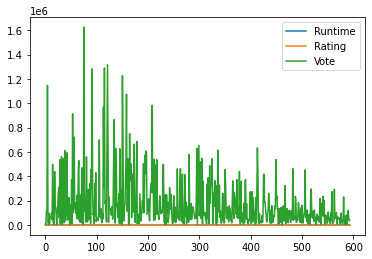

In [137]:
plt.figure(figsize=(20,20))
final1.plot.line()